In [158]:
import pandas as pd
import numpy as np

In [159]:
data = pd.read_csv('GOOG.csv')
Date1 = data['Date']
Price_G = data['Open']
vol = data['Volume']
p_500 = data['SP500']
btc = data['BTC']
new_data = []
new_data.append(pd.DataFrame({'Date':Date1,
                              'Google': Price_G,
                              
                              'S&P500': p_500,
                              'BTC': btc
                              }))
new_data_df = pd.concat(new_data)
new_data_df.dropna(inplace=True)
new_data_df.info()
new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])  # Ensure the date column is in datetime format
df = new_data_df.set_index('Date')  # Set the date column as the index of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 0 to 2089
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2090 non-null   object 
 1   Google  2090 non-null   float64
 2   S&P500  2090 non-null   float64
 3   BTC     2090 non-null   float64
dtypes: float64(3), object(1)
memory usage: 81.6+ KB


In [160]:
# Agregați datele în time frame-uri săptămânale
df_weekly = df.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df = df_weekly
df = df.drop(df.index[0])

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df)

                Google     S&P500         BTC
Date                                         
2015-01-11   25.410336  2035.2400    280.4580
2015-01-18   24.871814  2020.4220    228.6800
2015-01-25   25.870473  2034.5575    221.2825
2015-02-01   26.109716  2030.4840    251.3440
2015-02-08   26.331706  2034.7940    227.2060
...                ...        ...         ...
2023-03-26  103.961999  3958.7640  27918.9560
2023-04-02  102.838000  4011.9020  27755.2780
2023-04-09  104.849998  4101.5775  28080.8275
2023-04-16  107.172000  4111.4720  29704.7180
2023-04-23  105.476999  4140.6760  29446.6680

[433 rows x 3 columns]


In [161]:
data_2 = pd.read_csv('WALCL.csv')
Date1_2 = data_2['Date']
Price_2 = data_2['WALCL']
new_data_2 = []
new_data_2.append(pd.DataFrame({'Date':Date1_2,
                              'FED_Balance': Price_2
                              }))
new_data_df_2 = pd.concat(new_data_2)
new_data_df_2.dropna(inplace=True)
new_data_df_2.info()
new_data_df_2['Date'] = pd.to_datetime(new_data_df_2['Date'])  # Ensure the date column is in datetime format
df_2 = new_data_df_2.set_index('Date')  # Set the date column as the index of the DataFrame

# Agregați datele în time frame-uri săptămânale
df_weekly_2 = df_2.resample('W').mean()  # puteți utiliza și alte metode de agregare, cum ar fi 'sum', 'max', 'min', etc.
df_2 = df_weekly_2

# Vizualizați DataFrame-ul rezultat cu time frame-uri săptămânale
print(df_2)

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 436
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         437 non-null    object 
 1   FED_Balance  437 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB
            FED_Balance
Date                   
2015-01-11    4499524.0
2015-01-18    4516077.0
2015-01-25    4512936.0
2015-02-01    4500064.0
2015-02-08    4500348.0
...                 ...
2023-04-23    8593263.0
2023-04-30    8562768.0
2023-05-07    8503994.0
2023-05-14    8503017.0
2023-05-21    8456760.0

[437 rows x 1 columns]


In [162]:
merged_df = df.merge(df_2, on='Date', how='outer')

In [163]:
df = merged_df.dropna()

In [164]:
df = df.astype(int)

In [165]:
from sklearn.preprocessing import StandardScaler

# Crearea obiectului scaler
scaler = StandardScaler()

# Aplicarea scaler-ului la DataFrame
df_scaled = scaler.fit_transform(df)

# Crearea unui nou DataFrame cu datele scalate
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

<Axes: >

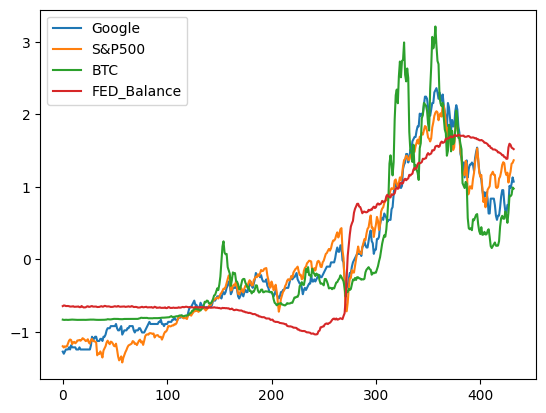

In [166]:
df_scaled.plot()

In [167]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [168]:
# ADF Test on each column
for name, column in df_scaled.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Google" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.006
 No. Lags Chosen       = 1
 Critical value 1%     = -3.446
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.7511. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "S&P500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6565
 No. Lags Chosen       = 5
 Critical value 1%     = -3.446
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.8577. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BTC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

In [169]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_scaled = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_scaled.columns:
        for r in df_scaled.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_scaled.loc[r, c] = min_p_value
    df_scaled.columns = [var + '_x' for var in variables]
    df_scaled.index = [var + '_y' for var in variables]
    return df_scaled

grangers_causation_matrix(df_scaled, variables = df_scaled.columns) 

,Google_x,S&P500_x,BTC_x,FED_Balance_x
Google_y,1.0000,0.0002,0.0000,0.0115
S&P500_y,0.0133,1.0000,0.0011,0.0037
BTC_y,0.0000,0.0103,1.0000,0.0003
FED_Balance_y,0.0001,0.0000,0.0102,1.0000


Interpretarea rezultatelor testului Granger pentru variabila "Google stock price":

Pentru a evalua dacă celelalte variabile cauzează variabila "Google stock price", analizăm valorile P asociate coeficienților în matricea rezultatelor testului Granger.

Valorile asociate celorlalte variabile sunt:

Pentru "S&P500_x" (S&P500), valoarea P este 0.0002. Această valoare sugerează că există o relație semnificativă între variabila "S&P500" și prețul acțiunilor Google, cu o influență probabilă.
Pentru "BTC_x" (BTC price), valoarea P este 0.0000. Această valoare indică o relație semnificativă și puternică între variabila "BTC price" și prețul acțiunilor Google, cu o influență probabilă.
Pentru "FED_Balance_x" (FED Asset balance), valoarea P este 0.0115. Această valoare indică o relație semnificativă între variabila "FED Asset balance" și prețul acțiunilor Google, cu o influență probabilă, deși mai slabă decât în cazul variabilei "BTC price".
În ansamblu, putem concluziona că variabilele "S&P500", "BTC price" și "FED Asset balance" au o influență semnificativă asupra prețului acțiunilor Google, cu variabila "BTC price" având cea mai puternică influență.

Este important de menționat că aceste concluzii sunt bazate pe analiza testului Granger și pot varia în funcție de setul de date și metoda utilizată.

In [170]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_scaled, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_scaled,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_scaled.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_scaled)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Google ::  43.72     > 40.1749   =>   True
S&P500 ::  15.55     > 24.2761   =>   False
BTC    ::  6.16      > 12.3212   =>   False
FED_Balance ::  0.06      > 4.1296    =>   False


In [171]:
# Diferențierea datelor
df_diff = df_scaled.diff()

# Eliminarea primului punct de date care devine NaN în urma diferențierii
df_diff = df_diff.dropna()

In [172]:
# ADF Test on each column
for name, column in df_diff.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Google" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.4679
 No. Lags Chosen       = 0
 Critical value 1%     = -3.446
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "S&P500" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4901
 No. Lags Chosen       = 4
 Critical value 1%     = -3.446
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BTC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.

In [173]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df_diff = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df_diff.columns:
        for r in df_diff.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df_diff.loc[r, c] = min_p_value
    df_diff.columns = [var + '_x' for var in variables]
    df_diff.index = [var + '_y' for var in variables]
    return df_diff

grangers_causation_matrix(df_diff, variables = df_diff.columns) 

,Google_x,S&P500_x,BTC_x,FED_Balance_x
Google_y,1.0000,0.0062,0.0000,0.0143
S&P500_y,0.0079,1.0000,0.0006,0.0076
BTC_y,0.0004,0.1071,1.0000,0.0012
FED_Balance_y,0.0003,0.0000,0.0118,1.0000


In [174]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_diff, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_diff,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_diff.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_diff)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Google ::  238.48    > 40.1749   =>   True
S&P500 ::  151.67    > 24.2761   =>   True
BTC    ::  74.22     > 12.3212   =>   True
FED_Balance ::  28.31     > 4.1296    =>   True


In [175]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(df_scaled)
best_aic = float('inf')
best_order = None

for i in range(1, 20):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

    if result.aic < best_aic:
        best_aic = result.aic
        best_order = i

print('Best Lag Order (based on AIC):', best_order)

Lag Order = 1
AIC :  -22.680805334091183
BIC :  -22.492452297598398
FPE :  1.4120601406954713e-10
HQIC:  -22.606444297468904 

Lag Order = 2
AIC :  -23.49632014675854
BIC :  -23.156691628791634
FPE :  6.247242481389785e-11
HQIC:  -23.362223533244986 

Lag Order = 3
AIC :  -23.471363474808747
BIC :  -22.979928984455828
FPE :  6.405431331361276e-11
HQIC:  -23.277310545492217 

Lag Order = 4
AIC :  -23.47599807394826
BIC :  -22.832224016868764
FPE :  6.376402345716792e-11
HQIC:  -23.22176677928231 

Lag Order = 5
AIC :  -23.510892096037757
BIC :  -22.71424174924133
FPE :  6.158660925000772e-11
HQIC:  -23.196259065183156 

Lag Order = 6
AIC :  -23.51466420754911
BIC :  -22.56459769391243
FPE :  6.136828668949469e-11
HQIC:  -23.139404737605965 

Lag Order = 7
AIC :  -23.486505948629624
BIC :  -22.382480211147822
FPE :  6.314027139252912e-11
HQIC:  -23.050393993758256 

Lag Order = 8
AIC :  -23.47070126821901
BIC :  -22.212170043988365
FPE :  6.417237065388119e-11
HQIC:  -22.973509428648207 

In [176]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,-6.664,-6.625,0.001276,-6.649
1,-22.52,-22.33,1.659e-10,-22.44
2,-23.35,-23.00*,7.249e-11,-23.21*
3,-23.33,-22.82,7.385e-11,-23.13
4,-23.34,-22.68,7.310e-11,-23.08
5,-23.38,-22.56,7.004e-11,-23.06
6,-23.39,-22.42,6.928e-11,-23.01
7,-23.37,-22.24,7.062e-11,-22.93
8,-23.37,-22.08,7.120e-11,-22.86
9,-23.39,-21.94,6.994e-11,-22.82


In [177]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(df_diff)
best_aic = float('inf')
best_order = None

for i in range(1, 20):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

    if result.aic < best_aic:
        best_aic = result.aic
        best_order = i

print('Best Lag Order (based on AIC):', best_order)

Lag Order = 1
AIC :  -23.47170561997293
BIC :  -23.28302310999132
FPE :  6.402794698457252e-11
HQIC:  -23.39720750135429 

Lag Order = 2
AIC :  -23.458116746922354
BIC :  -23.11789286898572
FPE :  6.490527024987782e-11
HQIC:  -23.32377241124168 

Lag Order = 3
AIC :  -23.461820443160132
BIC :  -22.96952263480522
FPE :  6.466854508049814e-11
HQIC:  -23.267408276650873 

Lag Order = 4
AIC :  -23.477959473350385
BIC :  -22.833052049753277
FPE :  6.363915362180837e-11
HQIC:  -23.223256543610944 

Lag Order = 5
AIC :  -23.486991202024864
BIC :  -22.68893533057005
FPE :  6.307645627214834e-11
HQIC:  -23.171773247272622 

Lag Order = 6
AIC :  -23.456105259874764
BIC :  -22.504358934459418
FPE :  6.506950047619905e-11
HQIC:  -23.080146678089104 

Lag Order = 7
AIC :  -23.42627407540227
BIC :  -22.32029209047231
FPE :  6.70605964138046e-11
HQIC:  -22.989347913355203 

Lag Order = 8
AIC :  -23.403306641863622
BIC :  -22.1425405661782
FPE :  6.864692153201899e-11
HQIC:  -22.90518458403664 

Lag O

c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [178]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,-22.50,-22.46,1.700e-10,-22.48
1,-23.31,-23.12*,7.517e-11,-23.23*
2,-23.30,-22.95,7.574e-11,-23.16
3,-23.31,-22.80,7.510e-11,-23.11
4,-23.34,-22.67,7.333e-11,-23.07
5,-23.35,-22.53,7.220e-11,-23.03
6,-23.33,-22.35,7.385e-11,-22.94
7,-23.31,-22.18,7.550e-11,-22.86
8,-23.29,-22.00,7.700e-11,-22.78
9,-23.34,-21.90,7.316e-11,-22.77


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


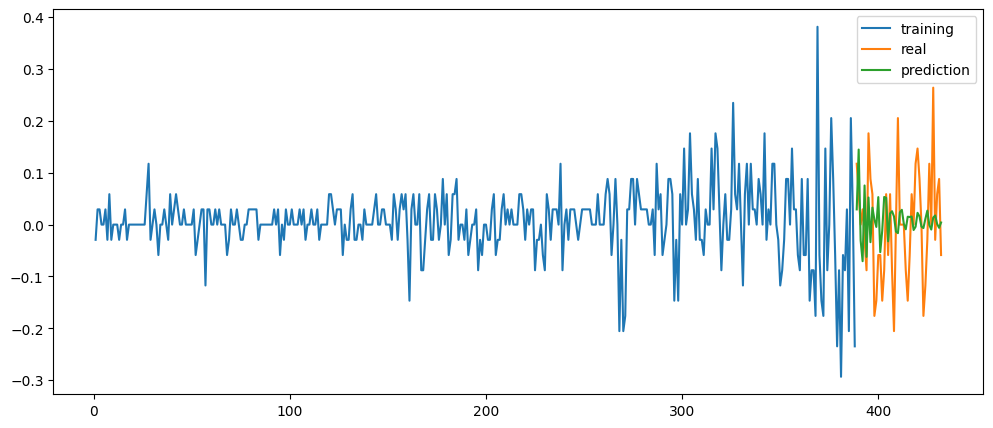

In [184]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Setăm procentul de date pentru instruire
train_ratio = 0.9
nobs = int(df_diff.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_diff[0:nobs], df_diff[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_diff.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns + '_pred')

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='training')
plt.plot(df_test.index, df_test['Google'], label='real')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='prediction')
plt.legend()
plt.show()

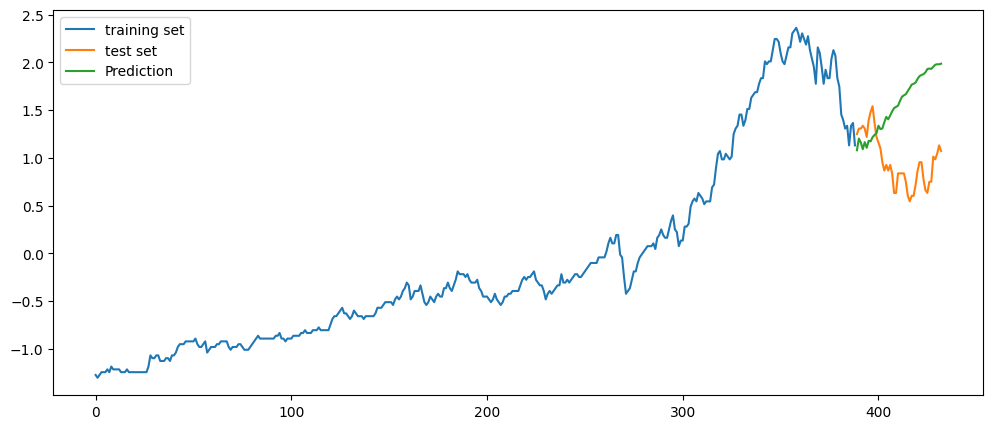

In [186]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled[0:nobs], df_scaled[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_scaled.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns + '_pred')

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='training set')
plt.plot(df_test.index, df_test['Google'], label='test set')
plt.plot(df_forecast.index, df_forecast['Google_pred'], label='Prediction')
plt.legend()
plt.show()

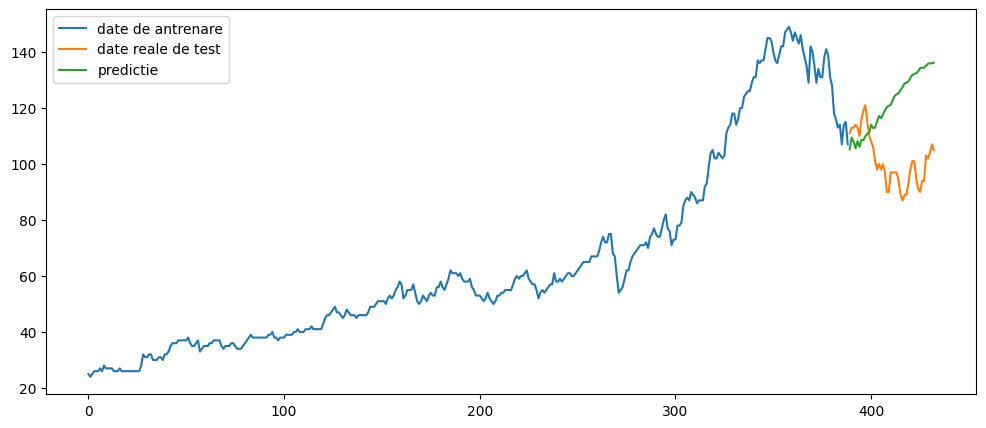

Mean Squared Error (MSE): 727.1909761374606
Mean Absolute Error (MAE): 23.4612618817089
Root Mean Squared Error (RMSE): 26.966478749318764


In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df_scaled[0:nobs], df_scaled[nobs:]

# Antrenăm modelul VAR
model = VAR(df_train)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_scaled.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns + '_pred')

# Convertim datele de test și predicție înapoi în forma inițială (fără normalizare)
test_data = scaler.inverse_transform(df_test)[:, 0]
pred_data = scaler.inverse_transform(df_forecast)[:, 0]

# Calculăm erorile pe datele de test și predicție
errors = test_data - pred_data
mse = mean_squared_error(test_data, pred_data)
mae = mean_absolute_error(test_data, pred_data)
rmse = np.sqrt(mse)

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, scaler.inverse_transform(df_train)[:, 0], label='date de antrenare')
plt.plot(df_test.index, test_data, label='date reale de test')
plt.plot(df_forecast.index, pred_data, label='predictie')
plt.legend()
plt.show()

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

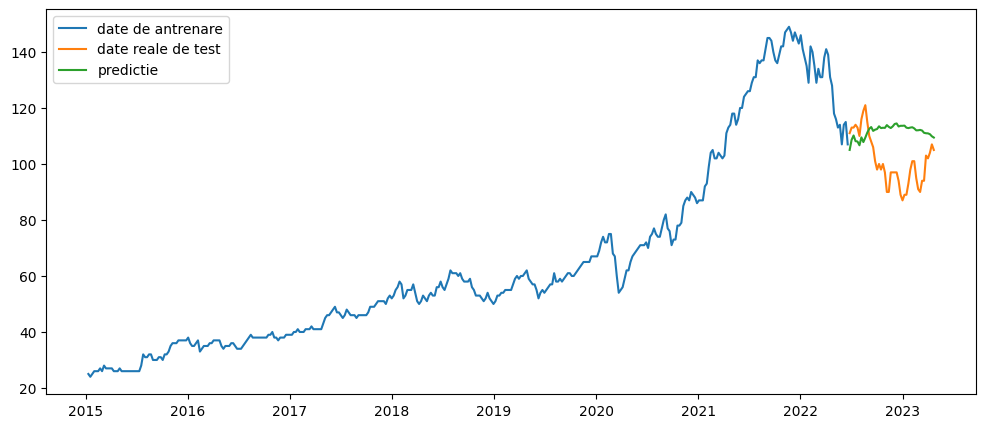

Mean Squared Error (MSE): 221.38652602527324
Mean Absolute Error (MAE): 13.06928818911503
Root Mean Squared Error (RMSE): 14.879063345025225


In [207]:
# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df.shape[0] * train_ratio)

# Selectăm doar coloanele 'Google' și 'FED_Balance' din dataframe
df_selected = df[['Google', 'FED_Balance']]

# Impartim setul de date
df_train, df_test = df_selected[0:nobs], df_selected[nobs:]

# Aplicăm scalarea doar pe setul de antrenare
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

# Antrenăm modelul VAR
model = VAR(df_train_scaled)
results = model.fit(maxlags=20, ic='aic')

# Facem predicții
lag_order = results.k_ar
forecast_input = df_test_scaled[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=df_test_scaled.shape[0])

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=[col + '_pred' for col in df_test.columns])

# Convertim datele de test și predicție înapoi în forma inițială (fără normalizare)
test_data = scaler.inverse_transform(df_test_scaled)
pred_data = scaler.inverse_transform(df_forecast)

# Selectăm doar coloana 'Google' pentru calculul erorilor
test_data_google = test_data[:, 0]
pred_data_google = pred_data[:, 0]

# Calculăm erorile pe datele de test și predicție
mse = mean_squared_error(test_data_google, pred_data_google)
mae = mean_absolute_error(test_data_google, pred_data_google)
rmse = np.sqrt(mse)

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, test_data_google, label='date reale de test')
plt.plot(df_forecast.index, pred_data_google, label='predictie')
plt.legend()
plt.show()

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

In [208]:
print(lag_order)

16


In [211]:
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error

# Setați intervalul pentru k_ar_diff
start_k_ar_diff = 1
end_k_ar_diff = 20

# Inițializați variabile pentru stocarea valorilor optime
best_k_ar_diff = None
best_coint_rank = None
best_rmse = float('inf')

# Parcurgeți intervalul pentru k_ar_diff
for k_ar_diff in range(start_k_ar_diff, end_k_ar_diff + 1):
    # Antrenați și testați modelul VECM pentru k_ar_diff curent
    vecm = VECM(df_train, k_ar_diff=k_ar_diff, coint_rank=1)  # Se presupune că coint_rank=1
    vecm_fit = vecm.fit()
    forecast = vecm_fit.predict(steps=len(df_test))
    df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns)
    rmse = np.sqrt(mean_squared_error(df_test, df_forecast))
    
    # Actualizați valoarea optimă pentru k_ar_diff dacă a fost găsit un RMSE mai mic
    if rmse < best_rmse:
        best_k_ar_diff = k_ar_diff
        best_rmse = rmse

# Afișați valoarea optimă pentru k_ar_diff
print("Valoarea optimă pentru k_ar_diff:", best_k_ar_diff)

Valoarea optimă pentru k_ar_diff: 10


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\razva\AppData\Local\Programs\Python

In [213]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Selectăm doar coloanele relevante pentru determinarea cointegrării
df_selected = df_scaled[['Google', 'S&P500', 'BTC', 'FED_Balance']]

# Impartim setul de date
df_train, df_test = df_selected[0:nobs], df_selected[nobs:]

# Realizăm testul Johansen pentru a determina cointegrarea
cointegration_rank = coint_johansen(df_train, det_order=0, k_ar_diff=10).eig

# Afișăm valorile proprii (eigenvalues) și rândul de cointegrare
print('Eigenvalues:')
print(cointegration_rank)
print('Cointegration Rank:')
print((cointegration_rank > 0.05).sum())

Eigenvalues:
[0.09743448 0.03702847 0.0147428  0.00132574]
Cointegration Rank:
1


c:\Users\razva\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


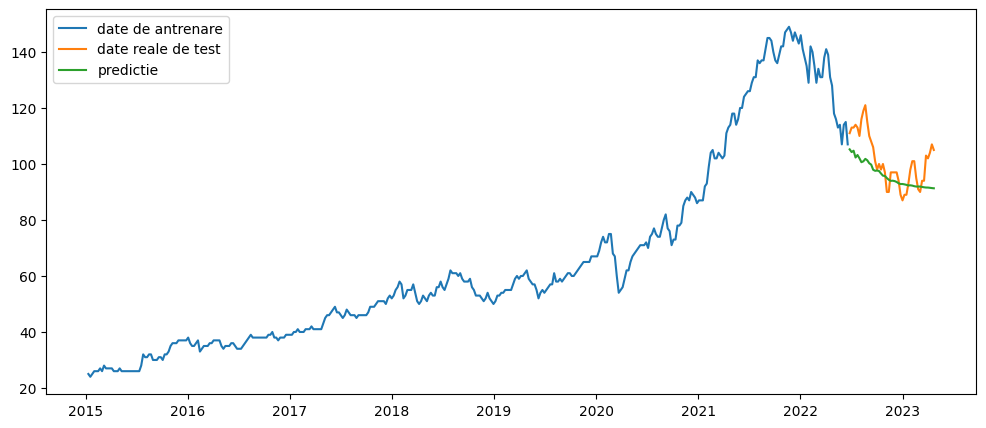

Mean Squared Error (MSE): 69.46
Mean Absolute Error (MAE): 6.716
Root Mean Squared Error (RMSE): 8.334


In [216]:
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df.shape[0] * train_ratio)

# Impartim setul de date
df_train, df_test = df[0:nobs], df[nobs:]

# Antrenăm modelul VECM
vecm = VECM(df_train, k_ar_diff=10, coint_rank=1)
vecm_fit = vecm.fit()

# Facem predicții
forecast = vecm_fit.predict(steps=len(df_test))

# Transformam predicțiile într-un dataframe pentru a putea face graficul
df_forecast = pd.DataFrame(forecast, index=df_test.index, columns=df_test.columns)

# Convertim datele de test și predicție înapoi în forma inițială (fără normalizare)
test_data = df_test['Google']
pred_data = df_forecast['Google']

# Calculăm erorile pe datele de test și predicție
mse = mean_squared_error(test_data, pred_data)
mae = mean_absolute_error(test_data, pred_data)
rmse = np.sqrt(mse)

# Rotunjim valorile erorilor la 3 zecimale
mse = round(mse, 3)
mae = round(mae, 3)
rmse = round(rmse, 3)

# Suprapunem datele de antrenare, predicțiile și datele reale din setul de testare pe grafic
plt.figure(figsize=(12, 5))
plt.plot(df_train.index, df_train['Google'], label='date de antrenare')
plt.plot(df_test.index, test_data, label='date reale de test')
plt.plot(df_forecast.index, pred_data, label='predictie')
plt.legend()
plt.show()

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

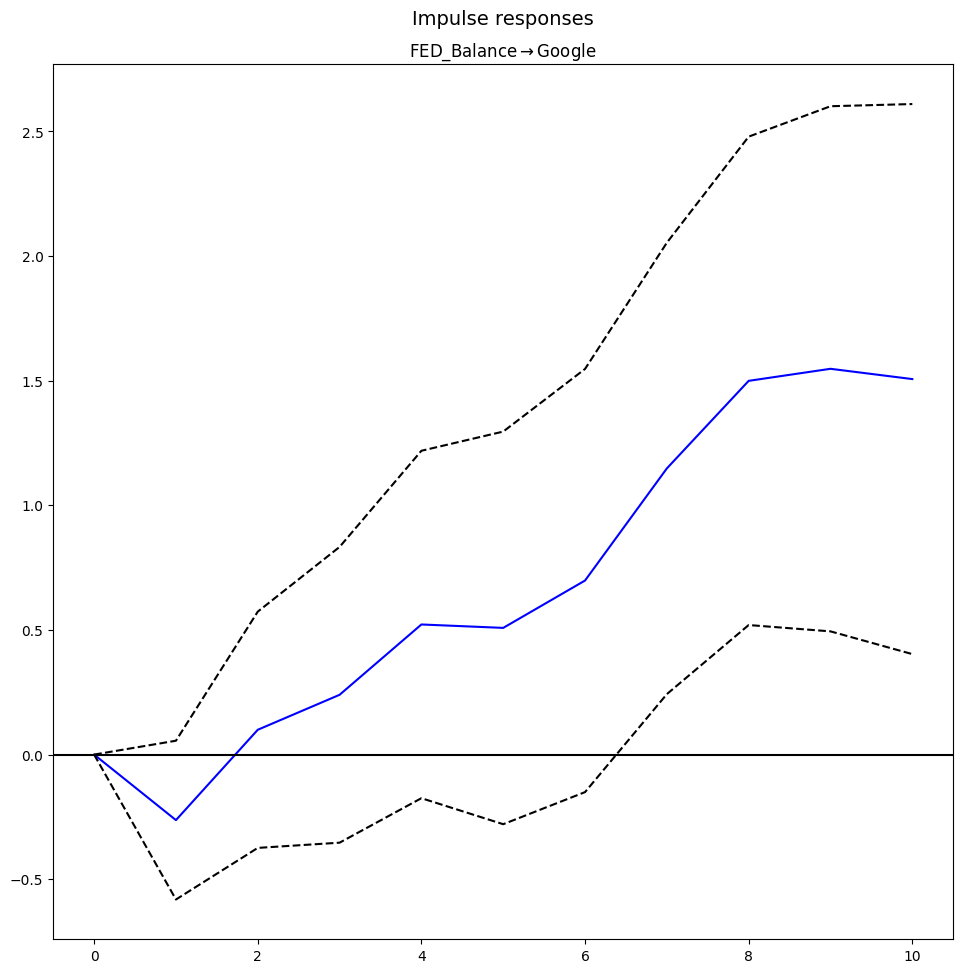

In [225]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.irf import IRAnalysis

# Setăm procentul de date pentru instruire
train_ratio = 0.90
nobs = int(df_scaled.shape[0] * train_ratio)

# Selectăm doar coloanele 'Google' și 'Price' din dataframe
df_selected = df_scaled[['Google', 'FED_Balance']]

# Impartim setul de date
df_train, df_test = df_selected[0:nobs], df_selected[nobs:]

# Antrenăm modelul VECM
model = VECM(df_train, k_ar_diff=10, coint_rank=1)
vecm_fit = model.fit()

# Calculăm funcția de impuls la răspuns
irf = vecm_fit.irf()

# Plotează funcția de impuls la răspuns pentru variabila 'Price' în funcție de 'Google'
irf.plot(impulse='FED_Balance', response='Google', signif=0.05)

# Afișează graficul
plt.show()